In [1]:
library(Synth)
library(LowRankQP)
library(conflicted)
library(dplyr)
library(rvest)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(viridis)
library(hrbrthemes)
library(googlesheets4)
library(skimr)
library(kableExtra)
library(ggthemes)
library(stargazer)
library(kableExtra)

##
## Synth Package: Implements Synthetic Control Methods.


## See https://web.stanford.edu/~jhain/synthpage.html for additional information.



LowRankQP 1.0 loaded
Copyright J.T. Ormerod & M. P. Wand 2023

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.5
v ggplot2   3.5.1     v stringr   1.5.1
v lubridate 1.9.4     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
Loading required package: viridisLite


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [2]:
link <- "https://docs.google.com/spreadsheets/d/e/2PACX-1vSkKDNXnPQtVgcWS8qwamdfd6Mrxb4ON3ul-R5s4LrTGVnxg3tVuNypORQUELFjlhD2GvcSjUQMMmyr/pub?output=csv"
data <- read.csv(link, header=TRUE)
head(data)

,year,state_num,state_abbr,state_name,total.crimes,population,total.crimes_per_population,violent_crime,violent_crime_per_population,homicide,...,gdp,median_household_income,Bodycam_Policy,kills_per_million,treatment,dem_majority,dem_governor,white.population,poc_percentage_population,poc_killed_by_police_percentage
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,...,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>
1,2013,0,AL,Alabama,365338,4833996,0.07557681,20834,0.004309892,346,...,193981.5,42849,0,4.35,0,0,0,3437356,0.2889204,76.19047619
2,2014,0,AL,Alabama,349628,4846411,0.07214163,20727,0.004276773,276,...,197064.4,42830,0,3.72,0,0,0,3440563,0.2900802,41.17647059
3,2015,0,AL,Alabama,335484,4853875,0.06911674,22957,0.004729623,348,...,203113.3,44765,0,3.71,0,0,0,3441742,0.2909290,38.88888889
4,2016,0,AL,Alabama,338274,4860545,0.06959590,25878,0.005324094,407,...,208824.3,46257,0,5.14,0,0,0,3445802,0.2910667,28
5,2017,0,AL,Alabama,338486,4875120,0.06943132,25469,0.005224282,419,...,216615.5,48123,0,5.33,0,0,0,3450537,0.2922150,34.61538462
6,2018,0,AL,Alabama,328538,4887681,0.06721756,25567,0.005230906,383,...,226263.8,49861,0,3.27,0,0,0,3457921,0.2925232,35.71428571


In [3]:
# Define the treated unit, donor pool, and treated year
treated_unit <- 30

# excluded_states <- c(6, 30, 5, 12, 19) # Exclude Conneticut, New Mexico, Colorado, Illinois, and Maryland
excluded_states <- c("Conneticut", "New Jersey", "Colorado", "Illinois", "Maryland") # Exclude Conneticut, New Mexico, Colorado, Illinois, and Maryland

donor_pool <- unique(data$state_name[data$state_num != treated_unit & !data$state_name %in% excluded_states])

treated_year <- 2021

dataprep_out <- dataprep(
  foo = data,
  predictors = c("kills_per_million", "gdp", "poc_percentage_population", "dem_majority", "dem_governor", "violent_crime_per_population", "homicity_per_populaiton"),  # Review and adjust the predictors
  dependent = "kills_per_million",  # Verify that the outcome variable is correctly specified
  unit.variable = "state_num",  # Verify the variable representing countries/regions
  time.variable = "year",
  treatment.identifier = treated_unit,
  controls.identifier = donor_pool,
  time.predictors.prior = 2013:2020,  # Adjust the time range for the placebo test
  time.optimize.ssr = 2013:2020,  # Adjust the time range for the placebo test
  unit.names.variable = "state_name",
  time.plot = 2013:2023,  # Adjust the time range for the placebo test
)

synth_out <- synth(dataprep_out)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.07931061 

solution.v:
 0.321603 0.3355481 0.004925731 0.01914117 0.1503676 0.01617511 0.1522392 

solution.w:
 1.522e-07 5.7e-09 5.7e-09 2.62e-08 0 0.1504305 2.709e-07 1.23e-08 9.86e-08 9.1e-09 3.5e-09 8.78e-08 4.4e-09 8.6e-09 5.4e-09 3.9826e-06 6e-10 0.4352109 3.62e-08 8.3e-09 0.02349392 8.74e-08 4.1e-09 6.2e-09 1.11e-08 2.8e-09 0.07121064 1.53322e-05 5.9e-09 0.2780011 5.6e-09 6.6e-09 1e-10 1.4493e-06 6.45788e-05 6.6e-09 3.2e-08 8.5e-09 3.9e-09 4.9e-09 0.04156668 6.6e-09 6.8e-09 9.3e-09 3.5e-09 



In [4]:
print(synth_out)


$solution.v
            kills_per_million       gdp poc_percentage_population dem_majority
Nelder-Mead          0.321603 0.3355481               0.004925731   0.01914117
            dem_governor violent_crime_per_population homicity_per_populaiton
Nelder-Mead    0.1503676                   0.01617511               0.1522392

$solution.w
       w.weight
0  1.521684e-07
1  5.697829e-09
2  5.669239e-09
3  2.618099e-08
4  7.777079e-12
6  1.504305e-01
7  2.709170e-07
8  1.228786e-08
9  9.863830e-08
10 9.083838e-09
11 3.501785e-09
13 8.778779e-08
14 4.371295e-09
15 8.586018e-09
16 5.368995e-09
17 3.982564e-06
18 5.870804e-10
20 4.352109e-01
21 3.617076e-08
22 8.308033e-09
23 2.349392e-02
24 8.744716e-08
25 4.094529e-09
26 6.217756e-09
27 1.110664e-08
28 2.763026e-09
31 7.121064e-02
32 1.533222e-05
33 5.904611e-09
34 2.780011e-01
35 5.617279e-09
36 6.641811e-09
37 6.494116e-11
38 1.449343e-06
39 6.457876e-05
40 6.556483e-09
41 3.203309e-08
42 8.479954e-09
43 3.862798e-09
44 4.920527e-09
45 4.

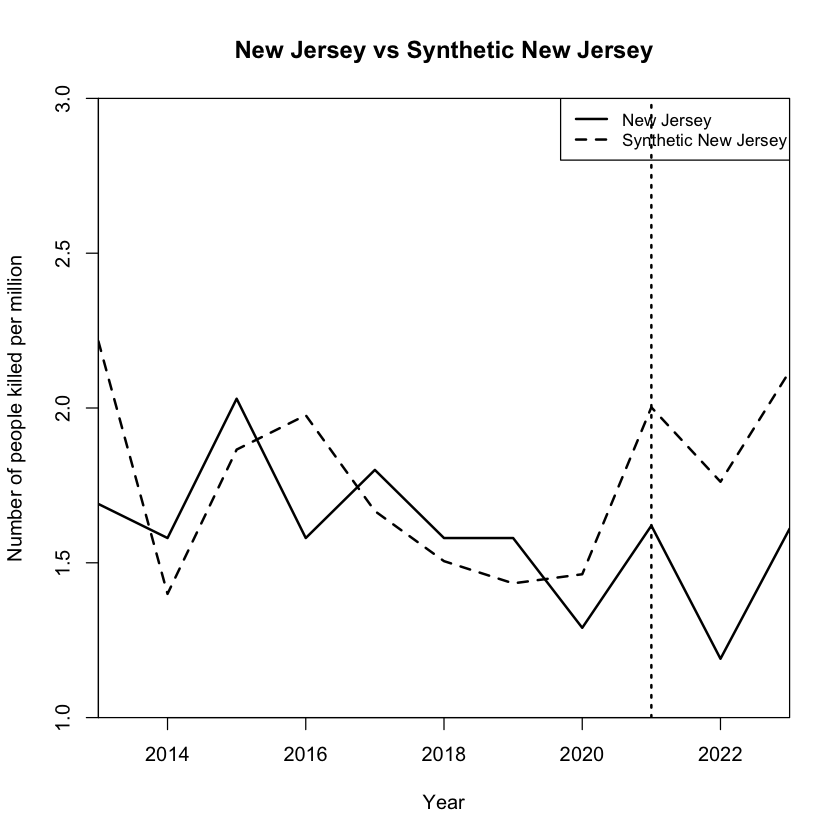

In [5]:
path.plot(synth.res = synth_out,
          dataprep.res = dataprep_out,
          tr.intake = 2020,
          Ylab = "Number of people killed per million",
          Xlab = "Year",
          Legend = c("New Mexico", "Synthetic New Mexico"),
          Main = "New Mexico vs Synthetic New Mexico",
          Ylim = c(1,5)
          )


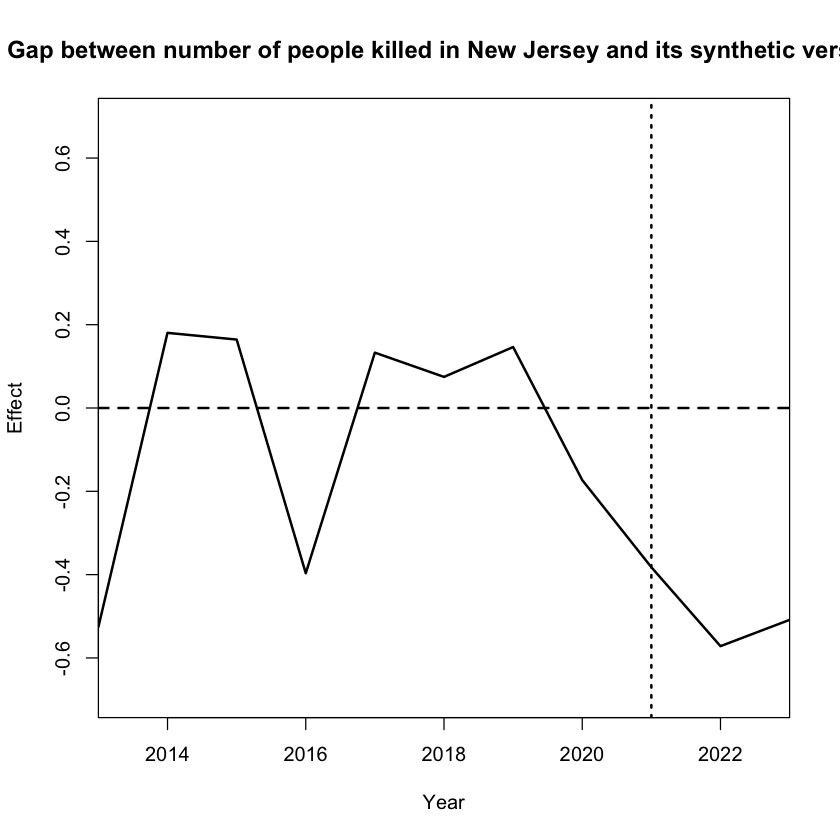

In [6]:
 gaps.plot(synth.res = synth_out,
          dataprep.res = dataprep_out,
          tr.intake = 2021,
          Ylab = "Effect",
          Xlab = "Year",
          Main = " Gap between number of people killed in New Jersey and its synthetic version")


In [7]:
gaps <- dataprep_out$Y1plot - (dataprep_out$Y0plot %*% synth_out$solution.w)

donor_weights <- synth_out$solution.w
donor_names <- donor_pool

# Create a data frame with weights, names, and spacing
donor_data <- data.frame(Weights = donor_weights, States = donor_names)

# Use stargazer to display the data frame
library(stargazer)
stargazer(donor_data, type = "text", summary = FALSE)



   w.weight     States    
--------------------------
0  0.00000     Alabama    
1     0         Alaska    
2     0        Arizona    
3  0.00000     Arkansas   
4     0       California  
6   0.150    Connecticut  
7  0.00000     Delaware   
8     0        Florida    
9  0.00000     Georgia    
10    0         Hawaii    
11    0         Idaho     
13 0.00000     Indiana    
14    0          Iowa     
15    0         Kansas    
16    0        Kentucky   
17 0.00000    Louisiana   
18    0         Maine     
20  0.435   Massachusetts 
21 0.00000     Michigan   
22    0       Minnesota   
23  0.023    Mississippi  
24 0.00000     Missouri   
25    0        Montana    
26    0        Nebraska   
27    0         Nevada    
28    0     New Hampshire 
31  0.071      New York   
32 0.00002  North Carolina
33    0      North Dakota 
34  0.278        Ohio     
35    0        Oklahoma   
36    0         Oregon    
37    0      Pennsylvania 
38 0.00000   Rhode Island 
39  0.0001  South Carolina


In [8]:
synth_tables <- synth.tab(dataprep.res = dataprep_out, synth.res = synth_out)

synth_tables[1:3]


$tab.pred
                                Treated  Synthetic Sample Mean
kills_per_million                 1.639      1.725       3.697
gdp                          600248.378 597753.702  384187.058
poc_percentage_population         0.257      0.181       0.178
dem_majority                      1.000      0.661       0.277
dem_governor                      0.444      0.482       0.341
violent_crime_per_population      0.002      0.003       0.004
homicity_per_populaiton           0.000      0.000       0.000

$tab.v
                             v.weights
kills_per_million            0.322    
gdp                          0.336    
poc_percentage_population    0.005    
dem_majority                 0.019    
dem_governor                 0.15     
violent_crime_per_population 0.016    
homicity_per_populaiton      0.152    

$tab.w
   w.weights     unit.names unit.numbers
0      0.000        Alabama            0
1      0.000         Alaska            1
2      0.000        Arizona            2
3      0.000       Arkansas            3
4      0.000     California            4
6      0.150    Connecticut            6
7      0.000       Delaware            7
8      0.000        Florida            8
9      0.000        Georgia            9
10     0.000         Hawaii           10
11     0.000          Idaho           11
13     0.000        Indiana           13
14     0.000           Iowa           14
15     0.000         Kansas           15
16     0.000       Kentucky           16
17     0.000      Louisiana           17
18     0.000          Maine           18
20     0.435  Massachusetts           20
21     0.000       Michigan           21
22     0.000      Minnesota           22
23     0.023    Mississippi           23
24     0.000       Missouri           24
25     0.000        Montana           25
26     0.000       Nebraska           26
27     0.000         Nevada           27
28     0.000  New Hampshire           28
31     0.071       New York           31
32     0.000 North Carolina           32
33     0.000   North Dakota           33
34     0.278           Ohio           34
35     0.000       Oklahoma           35
36     0.000         Oregon           36
37     0.000   Pennsylvania           37
38     0.000   Rhode Island           38
39     0.000 South Carolina           39
40     0.000   South Dakota           40
41     0.000      Tennessee           41
42     0.000          Texas           42
43     0.000           Utah           43
44     0.000        Vermont           44
45     0.042       Virginia           45
46     0.000     Washington           46
47     0.000  West Virginia           47
48     0.000      Wisconsin           48
49     0.000        Wyoming           49

In [9]:
if (!requireNamespace("remotes", quietly = TRUE)) {
  install.packages("remotes")
}

# Install SCtools package from GitHub
remotes::install_github("bcastanho/SCtools")


Using GitHub PAT from the git credential store.

Skipping install of 'SCtools' from a github remote, the SHA1 (64cdd39a) has not changed since last install.
  Use `force = TRUE` to force installation



In [10]:
library(SCtools)

Loading required package: future



In [23]:
placebo <- generate.placebos(dataprep_out, synth_out, Sigf.ipop = 2, strategy='multicore')


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.7491603 

solution.v:
 0.7892779 4.33925e-05 6.918e-07 4.2959e-06 0.003897869 0.173225 0.03355078 

solution.w:
 0.064575 0.01110525 0.0198496 0.01340353 0.0118616 0.0159562 0.015526 0.01513946 0.01113812 0.011012 0.01622634 0.01323482 0.01440421 0.0125319 0.3483803 0.01030871 0.01414011 0.01942343 0.01176772 0.01275351 0.01881593 0.01053803 0.01304028 0.01454579 0.01130165 0.01418779 0.01620205 0.01285163 0.01470636 0.009486352 0.01132184 0.01526399 0.01207349 0.02252135 0.01381129 0.02831018 0.01600489 0.01153249 0.01054246 0.01277861 0.01151585 0.01176645 0.01341412 0.01072933 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 12.10766 

solution.v:
 0.38527

New names:
* `w.weight` -> `w.weight...1`
* `w.weight` -> `w.weight...2`
* `w.weight` -> `w.weight...3`
* `w.weight` -> `w.weight...4`
* `w.weight` -> `w.weight...5`
* `w.weight` -> `w.weight...6`
* `w.weight` -> `w.weight...7`
* `w.weight` -> `w.weight...8`
* `w.weight` -> `w.weight...9`
* `w.weight` -> `w.weight...10`
* `w.weight` -> `w.weight...11`
* `w.weight` -> `w.weight...12`
* `w.weight` -> `w.weight...13`
* `w.weight` -> `w.weight...14`
* `w.weight` -> `w.weight...15`
* `w.weight` -> `w.weight...16`
* `w.weight` -> `w.weight...17`
* `w.weight` -> `w.weight...18`
* `w.weight` -> `w.weight...19`
* `w.weight` -> `w.weight...20`
* `w.weight` -> `w.weight...21`
* `w.weight` -> `w.weight...22`
* `w.weight` -> `w.weight...23`
* `w.weight` -> `w.weight...24`
* `w.weight` -> `w.weight...25`
* `w.weight` -> `w.weight...26`
* `w.weight` -> `w.weight...27`
* `w.weight` -> `w.weight...28`
* `w.weight` -> `w.weight...29`
* `w.weight` -> `w.weight...30`
* `w.weight` -> `w.weight...31`
* `w.w

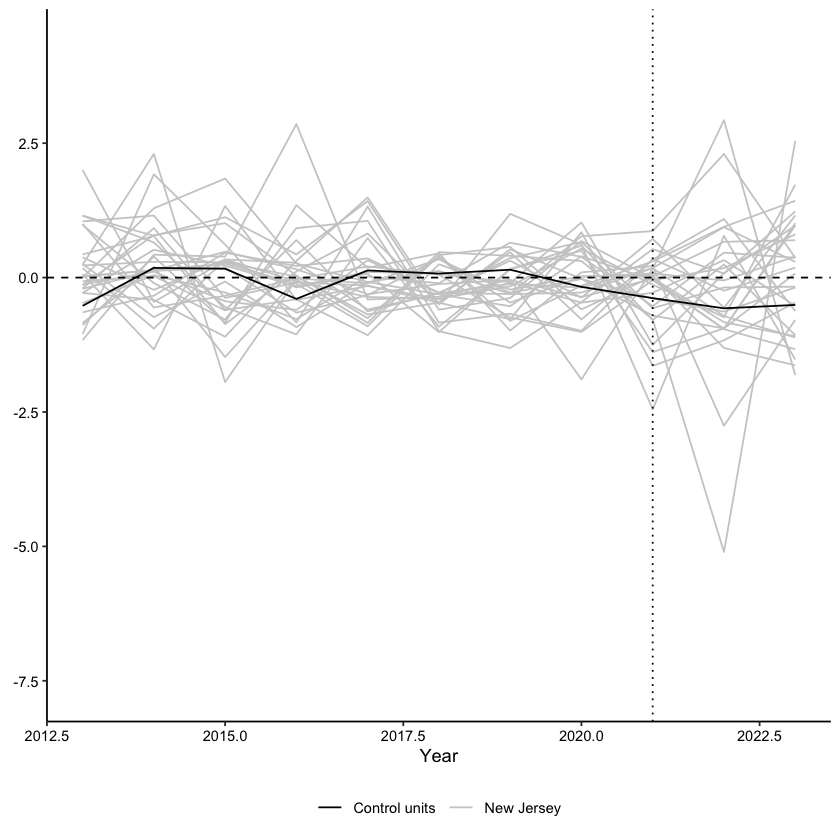

In [25]:
p <- plot_placebos(placebo, discard.extreme=TRUE, mspe.limit=20, xlab='Year')
p

In [16]:
# Calculate the p-value
ratio <- mspe.test(placebo)
print(ratio$p.val)


[1] 0.3478261


In [17]:
print(ratio$test)

   MSPE.ratios           unit
1   1.01082381        Alabama
2   0.64974632         Alaska
3   0.19482229        Arizona
4   1.01832203       Arkansas
5   1.32994564     California
6   1.08557034    Connecticut
7   0.73042296       Delaware
8   1.03876980        Florida
9   8.35947717        Georgia
10  4.44706272         Hawaii
11  9.62369700          Idaho
12  9.50152065        Indiana
13  7.36416130           Iowa
14  0.04290665         Kansas
15  7.84314148       Kentucky
16  1.53317524      Louisiana
17  0.16404300          Maine
18  8.71690510  Massachusetts
19  0.72899421       Michigan
20 23.52580020      Minnesota
21  0.43263962    Mississippi
22  0.98422115       Missouri
23  0.26859286        Montana
24  1.09176391       Nebraska
25  0.17690469         Nevada
26  0.64548248  New Hampshire
27  0.89238359       New York
28  0.12634258 North Carolina
29  0.94574229   North Dakota
30  2.29099435           Ohio
31  0.28333007       Oklahoma
32  4.17694308         Oregon
33  1.1002